In [1]:
import os
import shutil
import random

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from statistics import mean

import warnings
warnings.filterwarnings("ignore")

In [2]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

def cross_val(estimator, X, y, n_splits=10, n_repeats=5, random_state=888):
    
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

    y_pred = []
    y_true = []
    
    y_rmse = []
    y_r2 = []
    
    n_fold = 0
    
    for train, test in rkf.split(X):
    
        estimator.fit(X[train], y[train])
        
        y_pred.extend(estimator.predict(X[test]))
        y_true.extend(y[test])
       
        n_fold += 1
        
        if not n_fold % n_splits:
            
            y_rmse.append(rmse(y_true, y_pred))
            y_r2.append(r2_score(y_true, y_pred))
            
            y_pred.clear()
            y_true.clear()
            
            
    stats = {   'rmseMax': max(y_rmse),
                'rmseMin': min(y_rmse),
                'rmseAvg': mean(y_rmse),
                'r2Max': max(y_r2),
                'r2Min': min(y_r2),
                'r2Avg': mean(y_r2)   
            }

    return stats 

def plot_noise(X, y, c, file_name=None, save=False):
    
    plt.rcParams["figure.figsize"] = (9, 5)

    fig, ax = plt.subplots()

    ax.set_ylabel('sin(x)', fontsize=FONT)
    ax.set_xlabel('x', fontsize=FONT)
    ax.tick_params(axis='both', which='major', labelsize=FONT)
    plt.title('Зашумленных точек: {} %'.format(NOISE_POINTS * 100), fontsize=FONT)

    scatter1 = ax.scatter(X, y, c=c, marker='o', s=S)
    ax.legend(*scatter1.legend_elements(num=4), loc='higher right', fontsize=FONT)
    ax.legend().set_visible(False)
    
    if save:
        plt.savefig('pictures/{}_noise_{}.png'.format(NOISE_POINTS, file_name), bbox_inches='tight', dpi=750)
    
    plt.show()
    plt.clf()

    
def crosvalout(X, y, idx):

    i_out = []
    error = []

    for i in idx:

        i_out.append(i)

        X_new = np.delete(X, i_out, axis=0)
        y_new = np.delete(y, i_out)

        model = SVR()
        #model = XGBRegressor()
        
        stat = cross_val(model, X_new, y_new, n_splits=5, n_repeats=5, random_state=67)

        error.append(round(stat['r2Avg'], 2))

        if len(X_new) <= 5:
            break
            
    return error


def plot_crosaval(error, file_name=None, title='model', save=False):

    plt.figure(figsize=(9, 5))
    plt.yticks(va='center', fontsize=FONT)
    plt.xticks(va='top', fontsize=FONT)

    plt.ylabel('R^2', fontsize=FONT)
    plt.xlabel('Количество исключенных точек данных', fontsize=FONT)
    
    #plt.title('Зашумленных точек: {} %'.format(NOISE_POINTS * 100), fontsize=FONT)
    plt.title('{}'.format(title), fontsize=FONT)
    
    ax = sns.lineplot(x=[i for i in range(len(error))], y=error)
    plt.title('{}'.format(title), fontsize=FONT)
    #plt.ylim([0, 1])

    if save:
        plt.savefig('pictures/crosval_{}.png'.format(file_name), bbox_inches='tight', dpi=750)
        
    plt.show()
    plt.clf

    
def plot_noise_out(X, y, c, i_out=None, n_out=0.1, file_name=None, save=False):
    
    X_new = X.copy().ravel()
    y_new = y.copy()
    
    deleted = i_out[:int(n_out * len(i_out))]
    
    np.put(X_new, deleted, [None for i in deleted])
    np.put(y_new, deleted, [None for i in deleted])
    
    plt.rcParams["figure.figsize"] = (9, 5)

    fig, ax = plt.subplots()

    ax.set_ylabel('sin(x)', fontsize=FONT)
    ax.set_xlabel('x', fontsize=FONT)
    ax.tick_params(axis='both', which='major', labelsize=FONT)
    
    plt.title('Зашумленных точек: {} %'.format(NOISE_POINTS * 100), fontsize=FONT)

    scatter1 = ax.scatter(X_new, 
                          y_new, 
                          c=c, marker='o', s=S)
    ax.legend(*scatter1.legend_elements(num=4), loc='higher right', fontsize=FONT)
    
    if save:
        plt.savefig('pictures/{}_noise_{}.png'.format('poly', file_name), bbox_inches='tight', dpi=750)
    
    plt.show()
    plt.clf()

In [3]:
def random_set(n_points=350, noise_points=0.1, noise_level_x=0.1, noise_level_base_y=0.1, noise_level_add_y=2):

    x = np.linspace(0, 10, n_points)
    y = np.sin(x)
    y = y + np.array([random.gauss(0, np.std(y) * noise_level_base_y) for i in y])

    noise_points = random.sample(range(len(x)), int(len(y) * noise_points))
    
    x_noised = x[noise_points] + np.array([random.gauss(0, np.std(x) * noise_level_x) for i in noise_points])
    
    y_noised = y[noise_points] + np.array([random.gauss(0, np.std(y) * noise_level_add_y) for i in noise_points])

    np.put(x, noise_points, x_noised)
    np.put(y, noise_points, y_noised)
    
    x = x.reshape(-1, 1)
    
    return x, y, noise_points

No handles with labels found to put in legend.


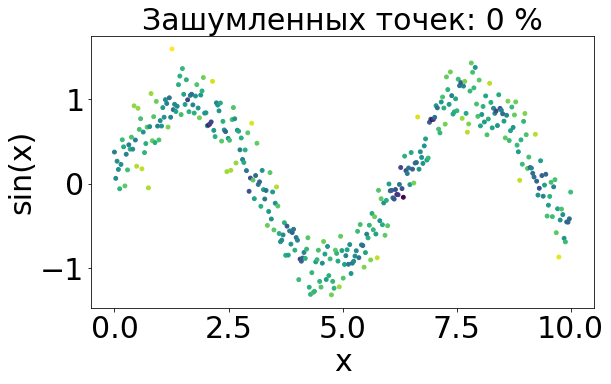

<Figure size 648x360 with 0 Axes>

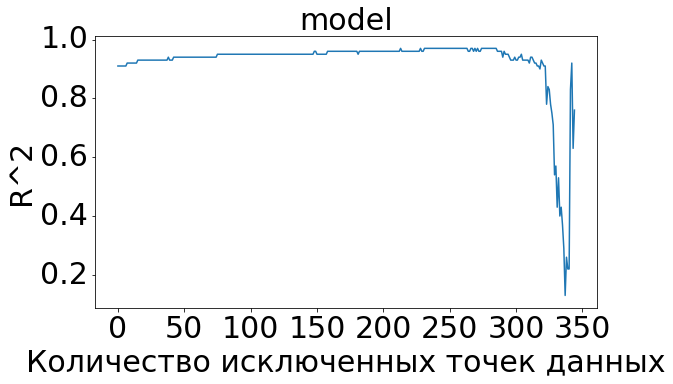

No handles with labels found to put in legend.


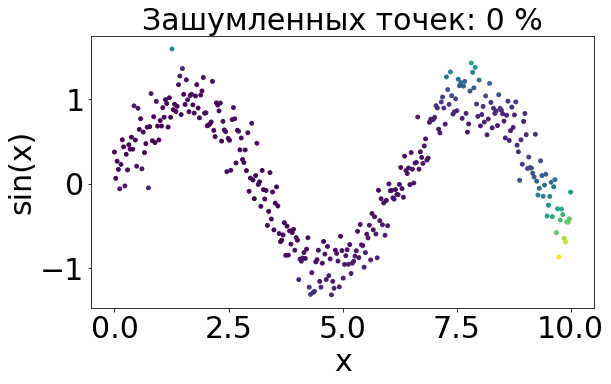

<Figure size 648x360 with 0 Axes>

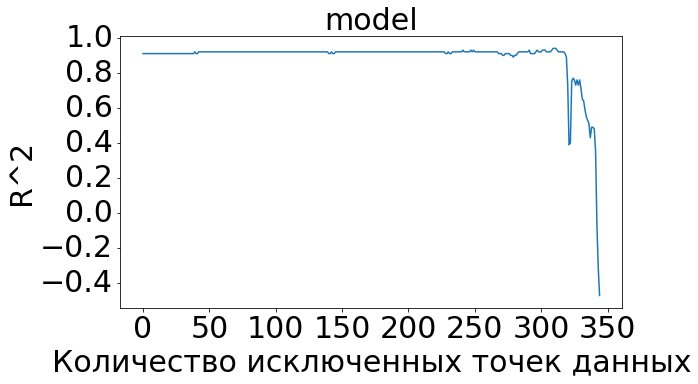

No handles with labels found to put in legend.


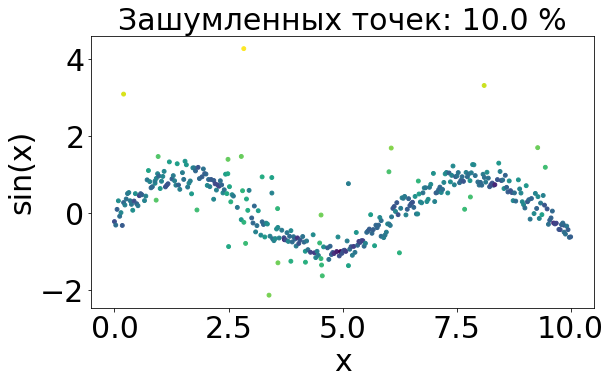

<Figure size 648x360 with 0 Axes>

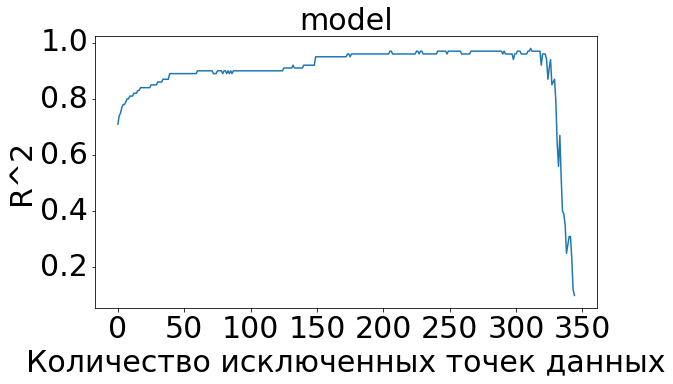

No handles with labels found to put in legend.


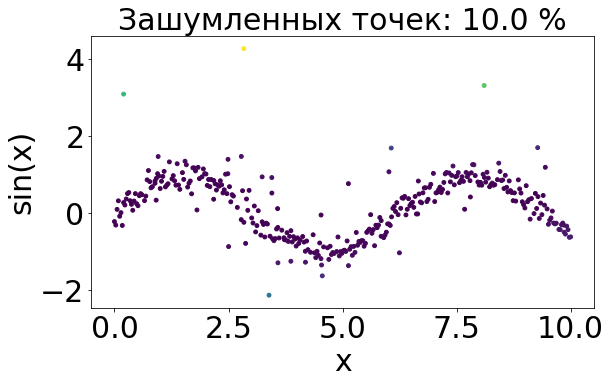

<Figure size 648x360 with 0 Axes>

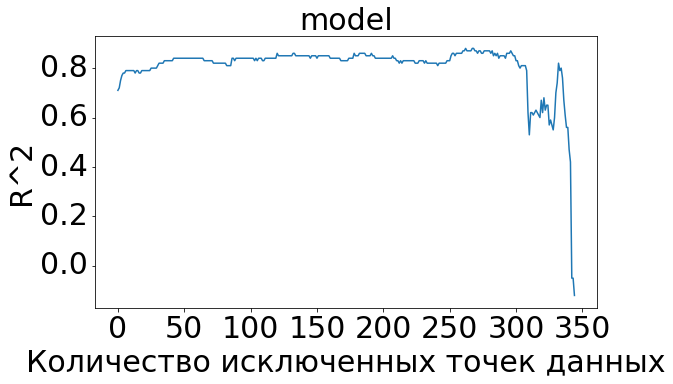

No handles with labels found to put in legend.


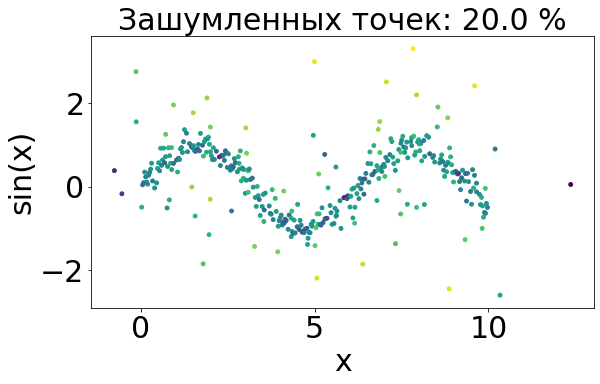

<Figure size 648x360 with 0 Axes>

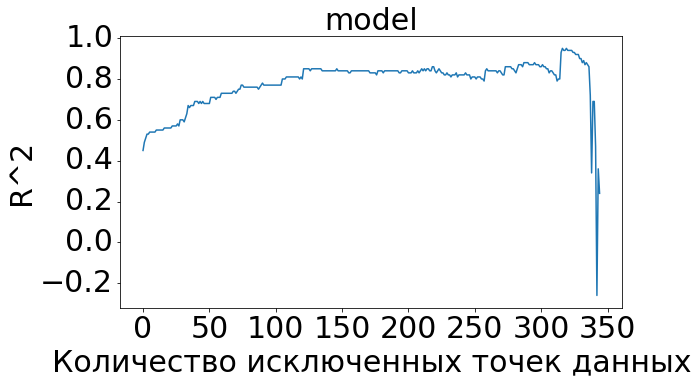

No handles with labels found to put in legend.


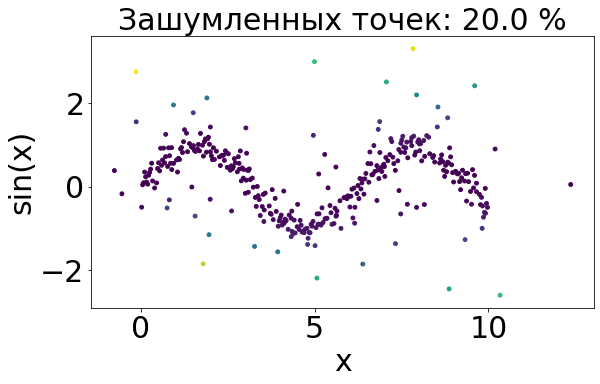

<Figure size 648x360 with 0 Axes>

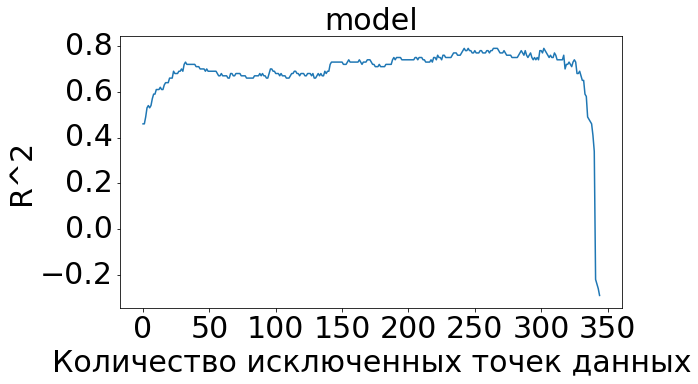

No handles with labels found to put in legend.


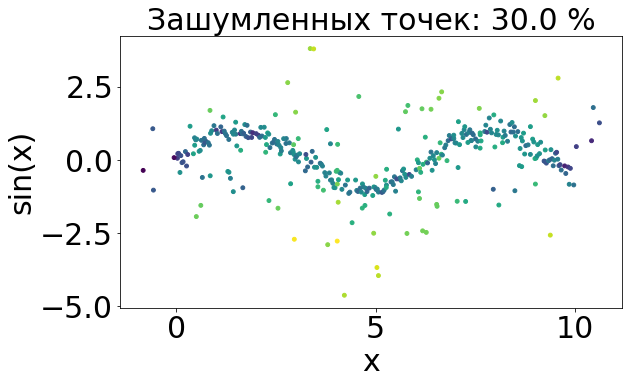

<Figure size 648x360 with 0 Axes>

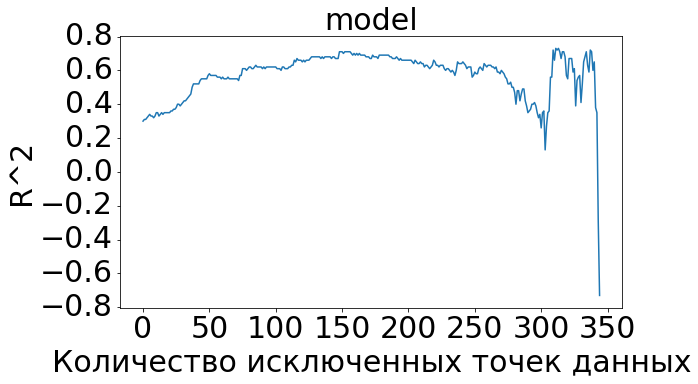

No handles with labels found to put in legend.


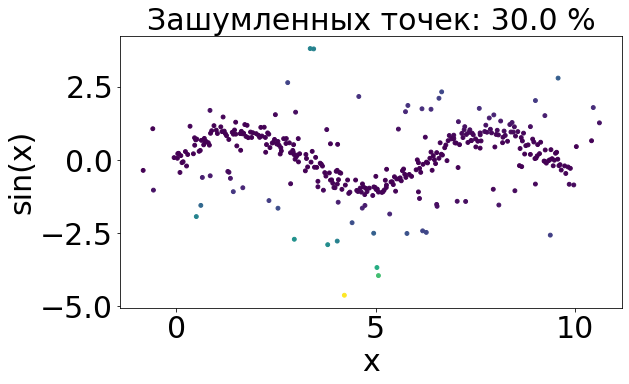

<Figure size 648x360 with 0 Axes>

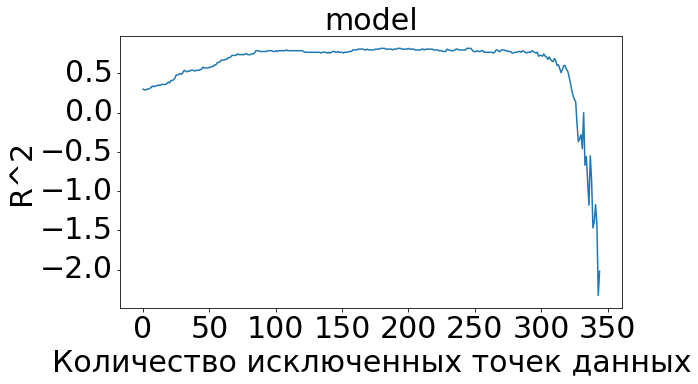

No handles with labels found to put in legend.


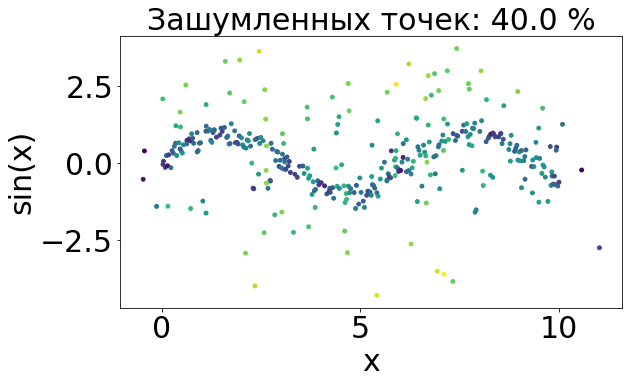

<Figure size 648x360 with 0 Axes>

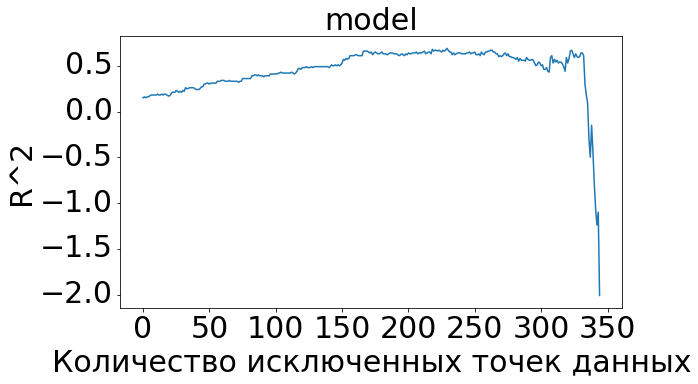

No handles with labels found to put in legend.


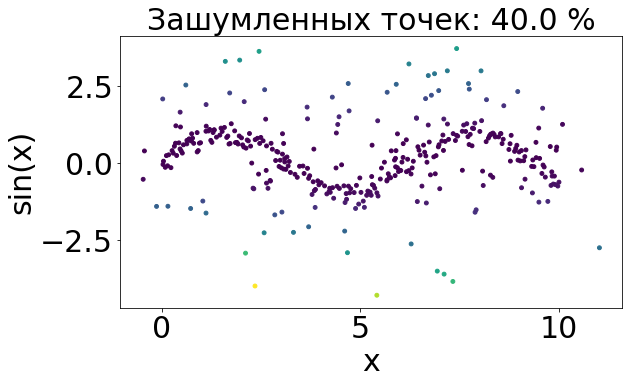

<Figure size 648x360 with 0 Axes>

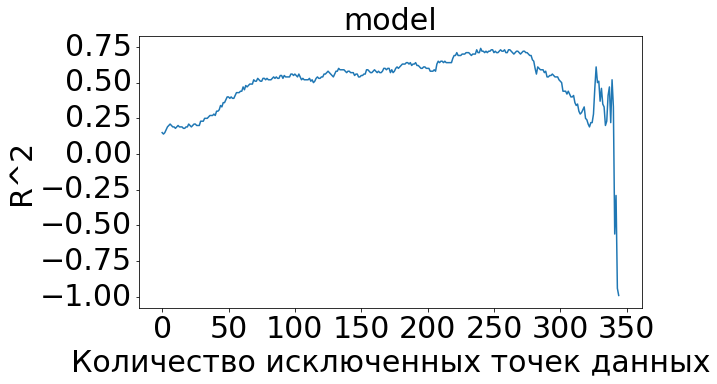

No handles with labels found to put in legend.


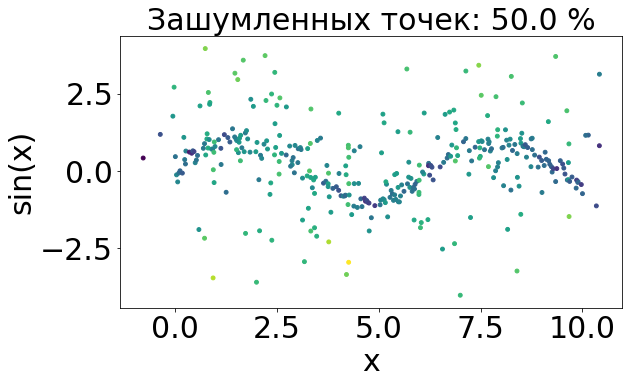

<Figure size 648x360 with 0 Axes>

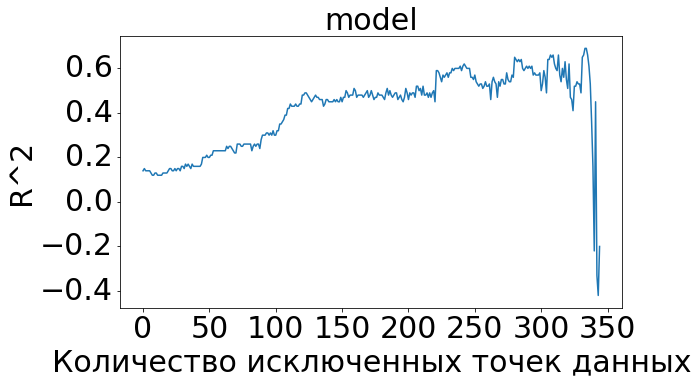

No handles with labels found to put in legend.


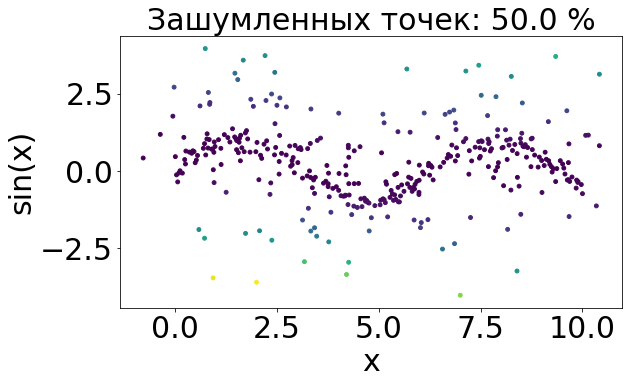

<Figure size 648x360 with 0 Axes>

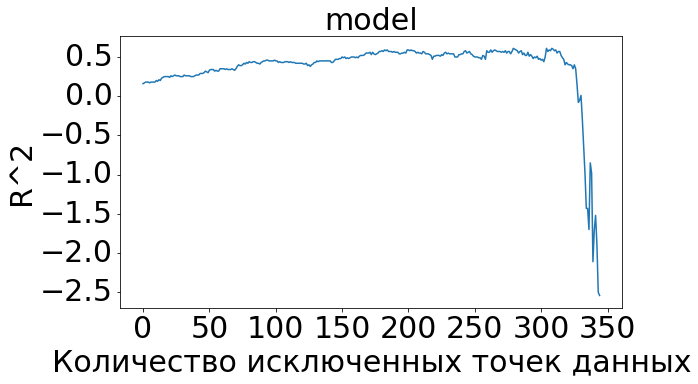

In [4]:
FONT = 30
S = 15

from neural_net import Net
from sali import calc_sali

OUT_DIR = 'pictures'

if os.path.exists(OUT_DIR):
   shutil.rmtree(OUT_DIR)
   os.mkdir(OUT_DIR)
else:
   os.mkdir(OUT_DIR)


for NOISE_POINTS in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    
    #Geberate Random Set
    X, y, noise_points = random_set(n_points=350, noise_points=NOISE_POINTS, noise_level_x=0.3, 
                                noise_level_base_y=0.3, noise_level_add_y=2)
    
    
    #Sali
    sali = calc_sali(X, y, k=7)
    c = [i[1] for i in sali]
    idx = sorted(sali, key=lambda x: x[1], reverse=True)
    idx = [i[0] for i in idx]

    plot_noise(X, y, c, file_name='SALI', save=True)
    error = crosvalout(X, y, idx)
    plot_crosaval(error, file_name='SALI', save=True)
    
    #Neural Net
    X_main, X_var = X.copy(), X.copy()
    X_var = np.hstack((X_var, y.reshape(-1, 1)))

    net = Net(inp_dim_main=X_main.shape[1], inp_dim_var=X_var.shape[1], hidden_dim=512, lmb=0, batch_size=320000000)
    net.cuda()
    net.fit(X_main, X_var, y, n_epochs=3000, lr=0.0001)
    
    conf = net.get_confidence(X_main, X_var)
    conf = [(n, i.item()) for i, n in zip(conf, range(len(conf)))]
    
    c = c = [i[1] for i in conf]
    idx = sorted(conf, key=lambda x: x[1], reverse=True)
    idx = [i[0] for i in idx]

    plot_noise(X, y, c, file_name='NET', save=True)
    error = crosvalout(X, y, idx)
    plot_crosaval(error, file_name='NET', save=True)